In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')

In [2]:
data_car = pd.read_csv('Car details v3.csv')

In [3]:
df = data_car.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        7907 non-null   object
 9   engine         7907 non-null   object
 10  max_power      7913 non-null   object
 11  torque         7906 non-null   object
 12  seats          8128 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 825.6+ KB


In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats              0
dtype: int64

In [7]:
# creating new cloumn brand nmae 
df.loc[:,'brand_name'] = df.loc[:,'name'].apply(lambda x: x.split(' ')[0])

In [8]:
df['brand_name'].value_counts()

brand_name
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [9]:
# droping values having count less than 20
values_to_drop = ['Mitsubishi','Force','Land','Isuzu','Kia','Ambassador','Daewoo','MG','Ashok','Opel','Peugeot']

In [10]:
# getting index of the rows to drop
rows_to_drop = df[df['brand_name'].isin(values_to_drop)].index

In [11]:
df.drop(rows_to_drop, inplace=True)

In [12]:
#Reset the index
df.reset_index(drop=True, inplace=True)

In [13]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5,Hyundai
8076,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5,Hyundai
8077,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5,Maruti
8078,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5,Tata


In [14]:
# extracting model from each car 
df.loc[:,'model'] = df.loc[:,'name'].apply(lambda x: ' '.join(x.split(' ')[1:3]))

In [15]:
## Now we have to convert the mileage,engine,max_power to integer
df.loc[:,'mileage'] = df.loc[:,'mileage'].apply(lambda x: float(x.split(' ')[0]) if pd.notna(x) else np.nan)
df.loc[:,'engine'] = df.loc[:,'engine'].apply(lambda x: float(x.split(' ')[0]) if pd.notna(x) else np.nan)

In [16]:
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)

In [17]:
def extract_max_power(i):
    
    if type(i) == str:
        if '.' in i.split(' ')[0]:
            idx = i.split(' ')[0].index('.') + 1
            len_str = len(i.split(' ')[0])
            main_val = int(i.split(' ')[0].replace('.',''))
            div_val  = 10**(len_str-idx)
            return main_val/div_val
        elif i.split(' ')[0].isdigit():
            return float(i.split(' ')[0])
        else:
            return np.nan
            
    else:
        return np.nan

In [18]:
df.loc[:,'max_power'] = df.loc[:,'max_power'].apply(lambda x: extract_max_power(x))

In [19]:
df['max_power'] = df['max_power'].astype(float)

In [20]:
df['max_power'].describe()

count    7865.000000
mean       91.367390
std        35.698858
min         0.000000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

In [21]:
import numpy as np

def extract_torque(i):
    if isinstance(i, str):
        clean_str = i.split(' ')[0].replace('Nm', '').replace('@', '').replace('nm', '').replace('NM', '').replace('kgm', '').replace('(38.7)', '').replace('(11.2)', '')
        
        if '.' in clean_str:
            idx = clean_str.index('.') + 1
            len_str = len(clean_str)
            main_val = int(clean_str.replace('.', ''))
            div_val = 10 ** (len_str - idx)
            return main_val / div_val
        elif clean_str.isdigit():
            return float(clean_str)
        else:
            return np.nan
    else:
        return np.nan


In [22]:
df.loc[:,'torque'] = df.loc[:,'torque'].apply(lambda x: extract_torque(x))

In [23]:
df['torque'] = df['torque'].astype(float)

In [24]:
df.loc[:,'torque'] = df.loc[:,'torque'].apply(lambda x: x*10 if x < 25 else x)

In [25]:
df['torque'].describe()

count    7859.000000
mean      176.070732
std        90.216694
min        25.000000
25%       111.800000
50%       170.000000
75%       205.000000
max       789.000000
Name: torque, dtype: float64

In [26]:
df['year'] = df['year'].astype(object)

In [27]:
df['seats'] = df['seats'].astype(object)

In [28]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,torque
count,8.080000e+03,8.080000e+03,7860.000000,7860.000000,7865.000000,7859.000000
mean,6.345573e+05,6.976090e+04,19.448266,1455.171628,91.367390,176.070732
std,8.016383e+05,5.648198e+04,4.023750,501.687012,35.698858,90.216694
min,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,25.000000
25%,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.050000,111.800000
50%,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,170.000000
75%,6.750000e+05,9.700000e+04,22.320000,1582.000000,102.000000,205.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000


In [29]:
numeric_variables = [i for i in df.columns.tolist() if df[i].dtype != 'O']

In [30]:
categorical_variables = [i for i in df.columns.tolist() if i not in numeric_variables]

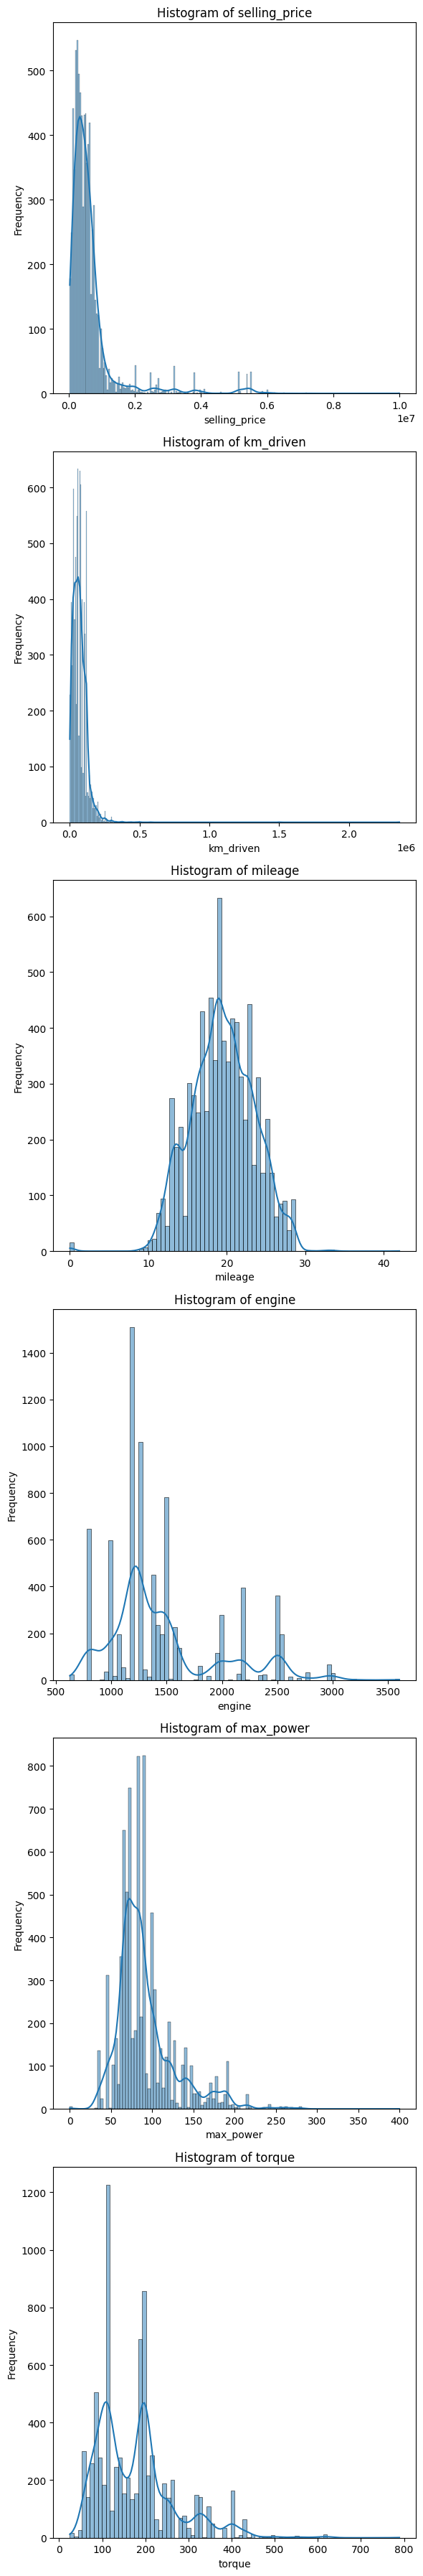

In [31]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), figsize=(6, 6 * len(numeric_variables)))

# Plot histograms for each continuous variable
for i, column in enumerate(numeric_variables):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
df.describe()

,selling_price,km_driven,mileage,engine,max_power,torque
count,8.080000e+03,8.080000e+03,7860.000000,7860.000000,7865.000000,7859.000000
mean,6.345573e+05,6.976090e+04,19.448266,1455.171628,91.367390,176.070732
std,8.016383e+05,5.648198e+04,4.023750,501.687012,35.698858,90.216694
min,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,25.000000
25%,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.050000,111.800000
50%,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,170.000000
75%,6.750000e+05,9.700000e+04,22.320000,1582.000000,102.000000,205.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000


In [33]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          220
engine           220
max_power        215
torque           221
seats              0
brand_name         0
model              0
dtype: int64

In [34]:
df[numeric_variables].isnull().sum()

selling_price      0
km_driven          0
mileage          220
engine           220
max_power        215
torque           221
dtype: int64

In [35]:
df.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift Dzire
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid 1.5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City 2017-2020


In [36]:
df['name'].nunique()

2027

In [37]:
df['fuel'].nunique()

4

In [38]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [39]:
df['fuel'].value_counts()

fuel
Diesel    4361
Petrol    3624
CNG         57
LPG         38
Name: count, dtype: int64

In [40]:
df['seller_type'].value_counts()

seller_type
Individual          6733
Dealer              1111
Trustmark Dealer     236
Name: count, dtype: int64

In [41]:
df['transmission'].value_counts()

transmission
Manual       7046
Automatic    1034
Name: count, dtype: int64

In [42]:
df['owner'].value_counts()

owner
First Owner             5259
Second Owner            2093
Third Owner              549
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [43]:
df['owner'] = np.where(df['owner'] == 'Fourth & Above Owner','Other',np.where(df['owner'] == 'Test Drive Car','Other',df['owner']))

In [44]:
df['owner'].value_counts()

owner
First Owner     5259
Second Owner    2093
Third Owner      549
Other            179
Name: count, dtype: int64

In [45]:
df['brand_name'].value_counts()

brand_name
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Name: count, dtype: int64

In [46]:
df['model'].value_counts()[0:10]

model
Swift Dzire         378
Wagon R             282
Grand i10           194
Innova 2.5          185
Swift VDI           146
Alto 800            144
Bolero 2011-2019    116
Verna 1.6           112
Alto K10            112
Alto LXi             92
Name: count, dtype: int64

In [47]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift Dzire
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid 1.5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City 2017-2020
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20 Sportz
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift VXI


In [48]:
df['brand_name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Volvo'], dtype=object)

In [49]:
df['model'] = np.where(df['model'] == 'Swift Dzire', 'Swift-Dzire',df['model'])

In [50]:
df['model'] = np.where(df['model'] == 'Wagon R', 'Wagon-R',df['model'])

In [51]:
df['model'] = np.where(df['model'] == 'New C-Class', 'C-Class',df['model'])

In [52]:
df['model'] = np.where(df['model'] == 'B Class', 'B-Class',df['model'])

In [53]:
df['model'] = np.where(df['model'] == '5 Series', '5-Series',df['model'])

In [54]:
df['model'] = np.where(df['model'] == '3 Series', '3-Series',df['model'])

In [55]:
df['model'] = np.where(df['model'] == '6 Series', '6-Series',df['model'])

In [56]:
df['model'] = np.where(df['model'] == '7 Series', '7-Series',df['model'])

In [57]:
df[df['brand_name'] == 'BMW']['model'].unique()

array(['X1 sDrive20i', '5-Series', 'X1 sDrive', 'X4 M', '3-Series',
       'X6 xDrive30d', '6-Series', 'X1 sDrive20d', '7-Series',
       'X7 xDrive', 'X3 xDrive20d', 'X5 3.0d'], dtype=object)

In [58]:
df[df['brand_name'] == 'BMW']['model'].value_counts()[:10]

model
X4 M            62
3-Series        19
5-Series        15
X1 sDrive20d     7
6-Series         6
X1 sDrive20i     2
X1 sDrive        2
X6 xDrive30d     2
7-Series         2
X7 xDrive        1
Name: count, dtype: int64

In [59]:
df.loc[:,'model'] = df.loc[:,'model'].apply(lambda x: x.split(' ')[0])

In [60]:
df['model'].value_counts()

model
Alto           420
Swift          404
Swift-Dzire    378
i20            341
Wagon-R        282
              ... 
Teana            1
Multivan         1
Yeti             1
Estate           1
GTI              1
Name: count, Length: 194, dtype: int64

In [61]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          220
engine           220
max_power        215
torque           221
seats              0
brand_name         0
model              0
dtype: int64

In [62]:
# mileage null and torque null are occuring together
df[df['torque'].isnull()]['mileage'].isnull().sum()

220

In [63]:
# engine null and torque null are occuring together
df[df['torque'].isnull()]['engine'].isnull().sum()

220

In [64]:
# max_power null and torque null are occuring together
df[df['torque'].isnull()]['max_power'].isnull().sum()

215

In [65]:
# seats null and torque null are occuring together
df[df['torque'].isnull()]['seats'].isnull().sum()

0

In [66]:
df.shape

(8080, 15)

In [67]:
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20


In [68]:
grouped_df = df.groupby(['brand_name','model'])['fuel'].count().reset_index()

In [69]:
model_list = grouped_df[grouped_df['fuel'] < 4]['model'].tolist()

In [70]:
df['model'] = df['model'].apply(lambda x: 'Other' if x in model_list else x)

In [71]:
# so we can say that all the null value are occuring toether
non_null_df = df[~df['torque'].isnull()]

In [72]:
non_null_df.shape

(7859, 15)

In [73]:
non_null_df[['mileage','engine','max_power','torque','selling_price','km_driven']].corr()

,mileage,engine,max_power,torque,selling_price,km_driven
mileage,1.000000,-0.573888,-0.372616,-0.250505,-0.120474,-0.173371
engine,-0.573888,1.000000,0.704617,0.720074,0.455557,0.206495
max_power,-0.372616,0.704617,1.000000,0.823375,0.750229,-0.037204
torque,-0.250505,0.720074,0.823375,1.000000,0.623902,0.083622
selling_price,-0.120474,0.455557,0.750229,0.623902,1.000000,-0.220318
km_driven,-0.173371,0.206495,-0.037204,0.083622,-0.220318,1.000000


In [74]:
non_null_df.describe()

,selling_price,km_driven,mileage,engine,max_power,torque
count,7.859000e+03,7.859000e+03,7859.000000,7859.000000,7859.000000,7859.000000
mean,6.459899e+05,6.912974e+04,19.449354,1455.255503,91.437145,176.070732
std,8.089546e+05,5.672113e+04,4.022850,501.663817,35.623062,90.216694
min,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,25.000000
25%,2.700000e+05,3.500000e+04,16.800000,1197.000000,68.050000,111.800000
50%,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,170.000000
75%,6.800000e+05,9.500000e+04,22.320000,1582.000000,102.000000,205.000000
max,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,789.000000


In [75]:
# Statstical Analysis on engine
non_null_df['engine'].describe()

count    7859.000000
mean     1455.255503
std       501.663817
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

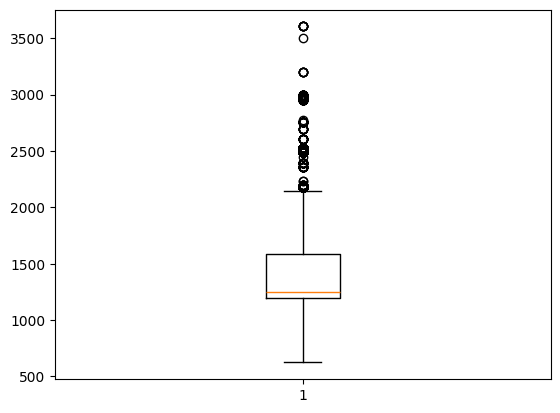

In [76]:
plt.boxplot(non_null_df['engine'])
plt.show()

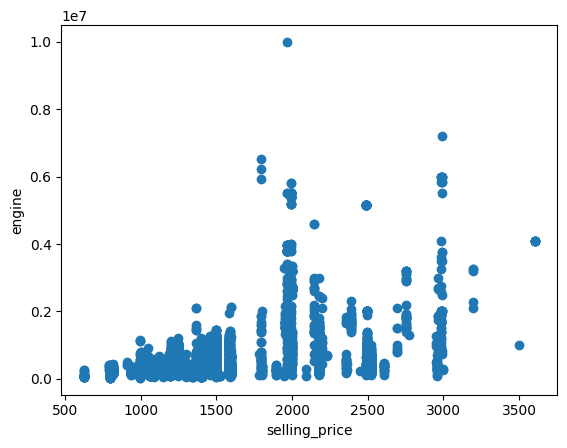

In [77]:
plt.scatter(non_null_df['engine'],non_null_df['selling_price'],)
plt.xlabel('selling_price')
plt.ylabel('engine')
plt.show()

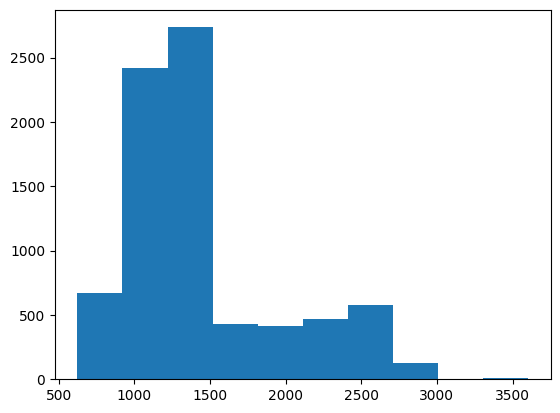

In [78]:
plt.hist(non_null_df['engine'])
plt.show()

In [79]:
non_null_df['engine'].min(),non_null_df['engine'].max()

(624.0, 3604.0)

In [80]:
q1 = non_null_df['engine'].quantile(0.25)
q2 = non_null_df['engine'].quantile(0.50)
q3 = non_null_df['engine'].quantile(0.75)

lower_limit_engine = q1 - 1.5*(q3-q1)
higher_limit_engine = q1 + 1.5*(q3-q1)

In [81]:
lower_limit_engine,higher_limit_engine

(619.5, 1774.5)

In [82]:
non_null_df.groupby('brand_name')['engine'].median().reset_index()

,brand_name,engine
0,Audi,1968.0
1,BMW,1995.0
2,Chevrolet,1199.0
3,Datsun,1198.0
4,Fiat,1248.0
5,Ford,1497.0
6,Honda,1497.0
7,Hyundai,1197.0
8,Jaguar,1999.0
9,Jeep,1956.0


In [83]:
non_null_df[(non_null_df['engine'] < lower_limit_engine) | (non_null_df['engine'] >= higher_limit_engine)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
39,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93,2179.0,138.03,320.0,7,Tata,Safari
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55,2982.0,168.50,343.0,7,Toyota,Fortuner
48,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2013,700000,99000,Diesel,Dealer,Manual,First Owner,12.99,2494.0,100.00,200.0,7,Toyota,Innova
49,Mercedes-Benz B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.80,2143.0,120.70,200.0,5,Mercedes-Benz,B-Class
54,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36,2755.0,171.50,360.0,7,Toyota,Innova
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8033,Tata New Safari DICOR 2.2 EX 4x2,2010,300000,100000,Diesel,Individual,Manual,First Owner,11.57,2179.0,138.10,320.0,7,Tata,New
8036,Chevrolet Captiva LT,2008,300000,100000,Diesel,Individual,Manual,Second Owner,11.50,1991.0,147.90,320.0,7,Chevrolet,Captiva
8038,Chevrolet Cruze LT,2011,300000,40000,Diesel,Individual,Manual,First Owner,18.30,1991.0,147.90,327.0,5,Chevrolet,Cruze
8052,Mahindra XUV500 W8 2WD,2013,750000,120000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,330.0,7,Mahindra,XUV500


In [84]:
non_null_df[non_null_df['engine'] > 3000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
133,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347.0,5,Jeep,Wrangler
1523,Ford Endeavour 3.2 Titanium AT 4X4,2018,3250000,12000,Diesel,Individual,Automatic,First Owner,10.91,3198.0,197.0,470.0,7,Ford,Endeavour
1557,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347.0,5,Jeep,Wrangler
1822,Ford Endeavour 3.2 Titanium AT 4X4,2018,3250000,12000,Diesel,Individual,Automatic,First Owner,10.91,3198.0,197.0,470.0,7,Ford,Endeavour
1852,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347.0,5,Jeep,Wrangler
1915,Ford Endeavour 3.2 Titanium AT 4X4,2016,2280000,120000,Diesel,Individual,Automatic,Second Owner,10.91,3198.0,197.0,470.0,7,Ford,Endeavour
3200,Ford Endeavour 3.2 Titanium AT 4X4,2016,2100000,80000,Diesel,Individual,Automatic,First Owner,10.91,3198.0,197.0,470.0,7,Ford,Endeavour
3225,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347.0,5,Jeep,Wrangler
5216,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.0,347.0,5,Jeep,Wrangler
5927,Mercedes-Benz E-Class E350 Petrol,2009,1000000,80000,Petrol,Individual,Automatic,Third Owner,10.93,3498.0,272.0,355.0,5,Mercedes-Benz,E-Class


In [85]:
non_null_df.groupby('brand_name')['engine'].median().reset_index()

,brand_name,engine
0,Audi,1968.0
1,BMW,1995.0
2,Chevrolet,1199.0
3,Datsun,1198.0
4,Fiat,1248.0
5,Ford,1497.0
6,Honda,1497.0
7,Hyundai,1197.0
8,Jaguar,1999.0
9,Jeep,1956.0


In [86]:
non_null_df[['engine','selling_price']].corr()

,engine,selling_price
engine,1.000000,0.455557
selling_price,0.455557,1.000000


In [87]:
# before outlier removal for mileage
non_null_df['mileage'].describe()

count    7859.000000
mean       19.449354
std         4.022850
min         0.000000
25%        16.800000
50%        19.330000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

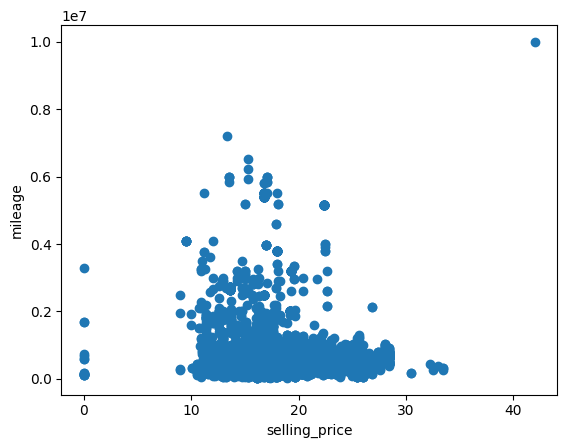

In [88]:
plt.scatter(non_null_df['mileage'],non_null_df['selling_price'],)
plt.xlabel('selling_price')
plt.ylabel('mileage')
plt.show()

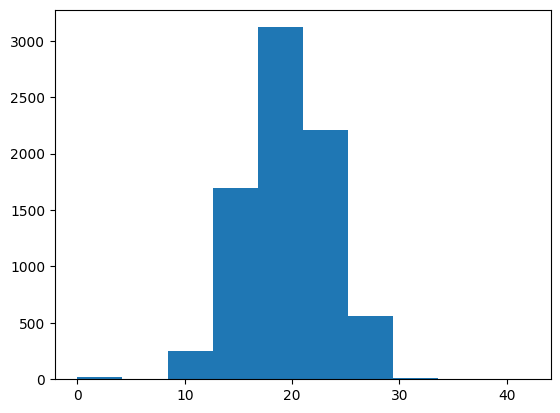

In [89]:
plt.hist(non_null_df['mileage'])
plt.show()

In [90]:
q1 = non_null_df['mileage'].quantile(0.25)
q2 = non_null_df['mileage'].quantile(0.50)
q3 = non_null_df['mileage'].quantile(0.75)

lower_limit_mileage = q1 - 1.5*(q3-q1)
higher_limit_mileage = q1 + 1.5*(q3-q1)

In [91]:
non_null_df[(non_null_df['mileage'] < lower_limit_mileage) | (non_null_df['mileage'] >= higher_limit_mileage)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
21,Honda WR-V i-DTEC VX,2017,950000,50000,Diesel,Individual,Manual,First Owner,25.50,1498.0,98.6,200.0,5,Honda,WR-V
22,Maruti Swift Dzire ZDI,2015,525000,40000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.0,190.0,5,Maruti,Swift-Dzire
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.3,60.0,4,Maruti,Alto
51,Honda City i DTEC S,2015,600000,54700,Diesel,Dealer,Manual,First Owner,26.00,1498.0,98.6,200.0,5,Honda,City
53,Honda Jazz VX Diesel,2015,525000,63000,Diesel,Dealer,Manual,First Owner,27.30,1498.0,98.6,200.0,5,Honda,Jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999,Honda Jazz V Diesel,2017,525000,37151,Diesel,Dealer,Manual,First Owner,27.30,1498.0,98.6,200.0,5,Honda,Jazz
8023,Honda Amaze VX O iDTEC,2015,409999,60000,Diesel,Individual,Manual,First Owner,25.80,1498.0,98.6,200.0,5,Honda,Amaze
8028,Maruti Ciaz ZDi,2014,560000,90000,Diesel,Individual,Manual,Second Owner,26.21,1248.0,88.5,200.0,5,Maruti,Ciaz
8042,Tata Nano Cx,2011,46000,25000,Petrol,Individual,Manual,Second Owner,26.00,624.0,35.0,48.0,4,Tata,Nano


In [92]:
non_null_df[non_null_df['mileage'] > non_null_df['mileage'].quantile(.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,60.0,4,Maruti,Alto
167,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,400.00,640.0,4,Volvo,Other
860,Maruti Alto 800 CNG LXI,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46,796.0,47.30,69.0,5,Maruti,Alto
2300,Maruti Wagon R CNG LXI,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998.0,58.33,78.0,5,Maruti,Wagon-R
3889,Maruti Alto 800 CNG LXI,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796.0,40.30,60.0,4,Maruti,Alto
3985,Maruti Alto 800 CNG LXI,2013,178000,70000,CNG,Individual,Manual,Second Owner,30.46,796.0,47.30,69.0,5,Maruti,Alto
5755,Maruti Alto K10 LXI CNG,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998.0,58.30,78.0,4,Maruti,Alto
5781,Maruti Alto 800 LXI CNG,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796.0,47.30,69.0,5,Maruti,Alto
7500,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,60.0,4,Maruti,Alto


In [93]:
non_null_df['mileage'] = np.where(non_null_df['mileage'] == 42.00,non_null_df[non_null_df['brand_name']=='Volvo']['mileage'].median(),non_null_df['mileage'])

In [94]:
# After outlier removal
non_null_df['mileage'].describe()

count    7859.000000
mean       19.446300
std         4.014831
min         0.000000
25%        16.800000
50%        19.330000
75%        22.320000
max        33.440000
Name: mileage, dtype: float64

In [95]:
non_null_df[non_null_df['mileage']==0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
638,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65.00,98.0,5,Tata,Indica
779,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.00,96.1,5,Hyundai,Santro
1642,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,96.1,5,Hyundai,Santro
1669,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165.00,510.0,5,Mercedes-Benz,M-Class
2354,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.10,96.1,5,Hyundai,Santro
2712,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.10,96.1,5,Hyundai,Santro
4500,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165.00,510.0,5,Mercedes-Benz,M-Class
5243,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.00,96.1,5,Hyundai,Santro
5808,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,175.0,5,Volkswagen,Polo
5811,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,175.0,5,Volkswagen,Polo


In [96]:
mileage_dff = non_null_df.groupby(['brand_name','model'])['mileage'].median().reset_index()

In [97]:
non_null_df['mileage'] = np.where(
    (non_null_df['mileage'] == 0) & (non_null_df['brand_name'] == 'Hyundai'),
    mileage_dff[(mileage_dff['brand_name'] == 'Hyundai') & (mileage_dff['model'] == 'Santro')]['mileage'].values[0],
    non_null_df['mileage']
)


In [98]:
non_null_df['mileage'] = np.where(
    (non_null_df['mileage'] == 0) & (non_null_df['brand_name'] == 'Mercedes-Benz'),
     mileage_dff[(mileage_dff['brand_name'] == 'Mercedes-Benz') & (mileage_dff['model'] == 'M-Class') ]['mileage'].values[0],
    non_null_df['mileage']
)

In [99]:
non_null_df['mileage'] = np.where(
    (non_null_df['mileage'] == 0) & (non_null_df['brand_name'] == 'Volkswagen'),
     mileage_dff[(mileage_dff['brand_name'] == 'Volkswagen') & (mileage_dff['model'] == 'Polo') ]['mileage'].values[0],
    non_null_df['mileage']
)

In [100]:
non_null_df['mileage'] = np.where(
    (non_null_df['mileage'] == 0) & (non_null_df['brand_name'] == 'Mahindra'),
     mileage_dff[(mileage_dff['brand_name'] == 'Mahindra') & (mileage_dff['model'] == 'Bolero') ]['mileage'].values[0],
    non_null_df['mileage']
)

In [101]:
non_null_df['mileage'] = np.where(
    (non_null_df['mileage'] == 0) & (non_null_df['brand_name'] == 'Tata'),
     mileage_dff[(mileage_dff['brand_name'] == 'Tata') & (mileage_dff['model'] == 'Indica') ]['mileage'].values[0],
    non_null_df['mileage']
)

In [102]:
non_null_df[non_null_df['mileage']==0]['brand_name'].value_counts()

Series([], Name: count, dtype: int64)

In [103]:
mileage_dff

,brand_name,model,mileage
0,Audi,A4,17.68
1,Audi,A6,17.68
2,Audi,Other,20.38
3,Audi,Q3,15.73
4,Audi,Q5,17.01
...,...,...,...
162,Volkswagen,Polo,20.14
163,Volkswagen,Vento,20.54
164,Volvo,Other,11.20
165,Volvo,V40,16.80


In [104]:
mileage_dff[(mileage_dff['brand_name'] == 'Mercedes-Benz') & (mileage_dff['model'] == 'M-Class') ]['mileage'].values[0]

11.74

In [105]:
mileage_dff[(mileage_dff['brand_name'] == 'Volkswagen') & (mileage_dff['model'] == 'Polo') ]['mileage'].values[0]

20.14

In [106]:
mileage_dff[(mileage_dff['brand_name'] == 'Mahindra') & (mileage_dff['model'] == 'Bolero') ]['mileage'].values[0]

15.96

In [107]:
mileage_dff[(mileage_dff['brand_name'] == 'Tata') & (mileage_dff['model'] == 'Indica') ]['mileage'].values[0]

17.88

In [108]:
# before outlier removal for mileage
non_null_df['mileage'].describe()

count    7859.000000
mean       19.480485
std         3.921261
min         9.000000
25%        16.800000
50%        19.330000
75%        22.320000
max        33.440000
Name: mileage, dtype: float64

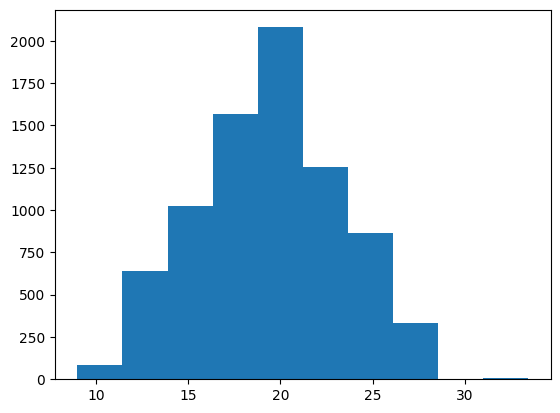

In [109]:
plt.hist(non_null_df['mileage'])
plt.show()

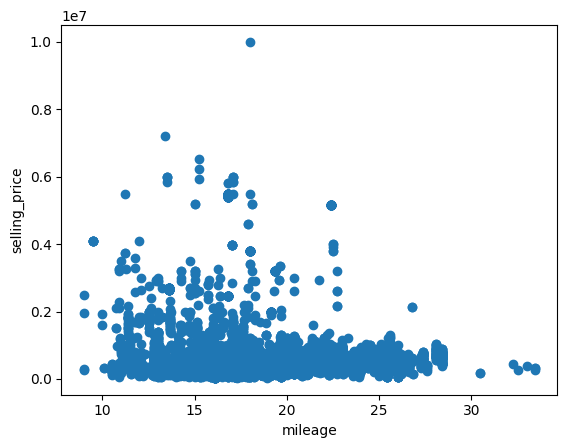

In [110]:
plt.scatter(non_null_df['mileage'],non_null_df['selling_price'],)
plt.xlabel('mileage')
plt.ylabel('selling_price')
plt.show()

In [111]:
non_null_df[['mileage','selling_price']].corr()

,mileage,selling_price
mileage,1.000000,-0.133692
selling_price,-0.133692,1.000000


In [112]:
numeric_variables

['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

In [113]:
# before outlier removal for max_power
non_null_df['max_power'].describe()

count    7859.000000
mean       91.437145
std        35.623062
min        32.800000
25%        68.050000
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

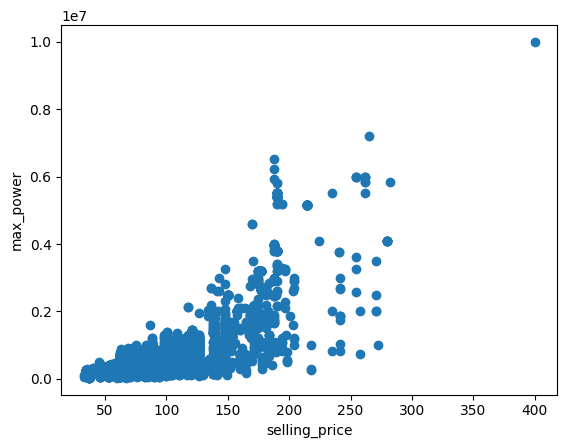

In [114]:
plt.scatter(non_null_df['max_power'],non_null_df['selling_price'],)
plt.xlabel('selling_price')
plt.ylabel('max_power')
plt.show()

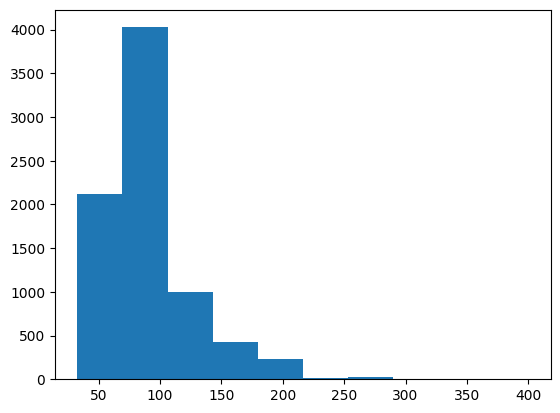

In [115]:
plt.hist(non_null_df['max_power'])
plt.show()

In [116]:
non_null_df['max_power'].min(), non_null_df['max_power'].max()

(32.8, 400.0)

In [117]:
q1 = non_null_df['max_power'].quantile(0.25)
q2 = non_null_df['max_power'].quantile(0.50)
q3 = non_null_df['max_power'].quantile(0.75)

lower_limit_max_power = q1 - 1.5*(q3-q1)
higher_limit_max_power = q1 + 1.5*(q3-q1)

In [118]:
lower_limit_max_power,higher_limit_max_power

(17.124999999999993, 118.975)

In [119]:
non_null_df[(non_null_df['max_power'] < lower_limit_max_power) | (non_null_df['max_power'] >= higher_limit_max_power)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
37,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.00,1591.0,121.30,151.0,5,Hyundai,Verna
39,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93,2179.0,138.03,320.0,7,Tata,Safari
41,Jeep Compass 1.4 Limited Plus BSIV,2019,2100000,5000,Petrol,Individual,Automatic,First Owner,16.00,1368.0,160.77,250.0,5,Jeep,Compass
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55,2982.0,168.50,343.0,7,Toyota,Fortuner
49,Mercedes-Benz B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.80,2143.0,120.70,200.0,5,Mercedes-Benz,B-Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,Chevrolet Cruze LT,2011,300000,40000,Diesel,Individual,Manual,First Owner,18.30,1991.0,147.90,327.0,5,Chevrolet,Cruze
8046,Hyundai Verna 1.6 CRDI,2011,450000,100000,Diesel,Individual,Manual,First Owner,22.32,1582.0,126.30,259.9,5,Hyundai,Verna
8052,Mahindra XUV500 W8 2WD,2013,750000,120000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,330.0,7,Mahindra,XUV500
8055,Hyundai Verna 1.6 SX CRDi (O),2011,450000,128000,Diesel,Individual,Manual,Second Owner,22.32,1582.0,126.32,259.8,5,Hyundai,Verna


In [120]:
non_null_df[non_null_df['max_power'] > non_null_df['max_power'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
133,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.00,347.0,5,Jeep,Wrangler
134,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,620.0,5,Mercedes-Benz,S-Class
143,Audi Q7 35 TDI Quattro Premium,2015,2650000,53000,Diesel,Dealer,Automatic,First Owner,12.07,2967.0,241.40,550.0,7,Audi,Q7
145,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282.00,490.0,5,Mercedes-Benz,S-Class
167,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,18.00,1969.0,400.00,640.0,4,Volvo,Other
622,Honda Accord V6 AT,2004,275000,100000,Petrol,Individual,Automatic,Second Owner,9.00,2997.0,218.00,196.0,5,Honda,Accord
1051,BMW X6 xDrive30d,2013,3750000,56000,Diesel,Dealer,Automatic,First Owner,11.20,2993.0,241.00,540.0,4,BMW,Other
1064,BMW 6 Series GT 630d Luxury Line,2018,6000000,28156,Diesel,Dealer,Automatic,First Owner,17.09,2993.0,261.40,620.0,4,BMW,6-Series
1557,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.00,347.0,5,Jeep,Wrangler
1852,Jeep Wrangler 2016-2019 3.6 4X4,2017,4100000,17000,Petrol,Individual,Automatic,First Owner,9.50,3604.0,280.00,347.0,5,Jeep,Wrangler


In [121]:
non_null_df[non_null_df['max_power'] > 290]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
167,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,18.0,1969.0,400.0,640.0,4,Volvo,Other


In [122]:
non_null_df['max_power'] = np.where(non_null_df['max_power'] > 290,non_null_df[non_null_df['brand_name'] == 'Volvo']['max_power'].median(),non_null_df['max_power'] )

In [123]:
non_null_df[non_null_df['brand_name'] == 'Volvo']['max_power'].median()

190.0

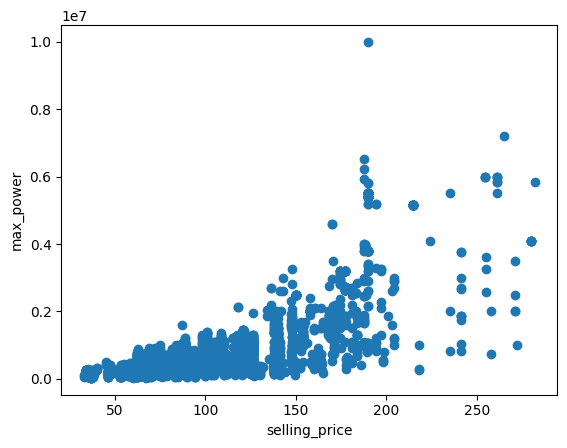

In [124]:
plt.scatter(non_null_df['max_power'],non_null_df['selling_price'],)
plt.xlabel('selling_price')
plt.ylabel('max_power')
plt.show()

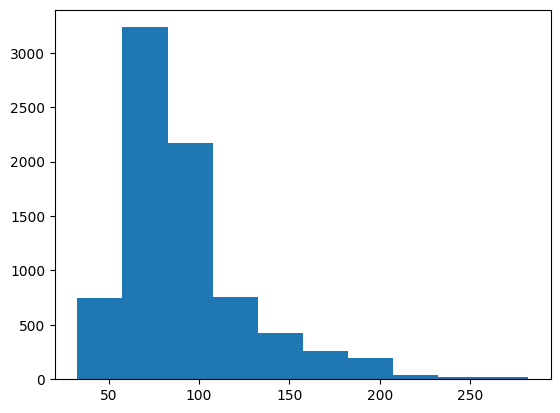

In [125]:
plt.hist(non_null_df['max_power'])
plt.show()

In [126]:
numeric_variables

['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

In [127]:
non_null_df['torque'].describe()

count    7859.000000
mean      176.070732
std        90.216694
min        25.000000
25%       111.800000
50%       170.000000
75%       205.000000
max       789.000000
Name: torque, dtype: float64

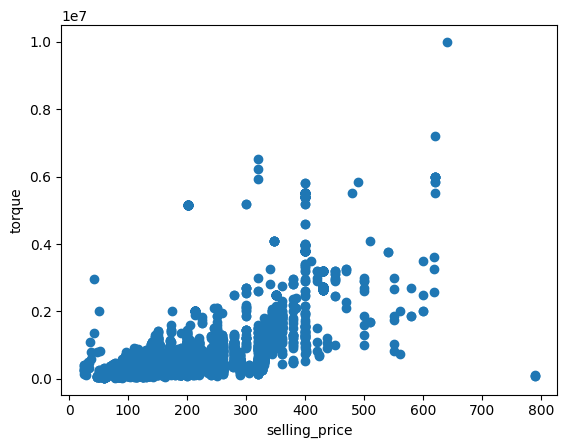

In [128]:
plt.scatter(non_null_df['torque'],non_null_df['selling_price'],)
plt.xlabel('selling_price')
plt.ylabel('torque')
plt.show()

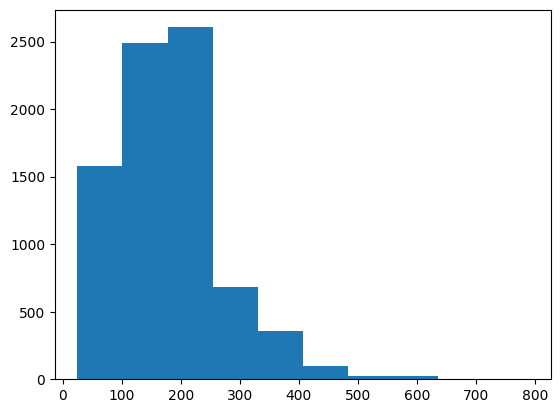

In [129]:
plt.hist(non_null_df['torque'])
plt.show()

In [130]:
non_null_df['torque'].min(),non_null_df['torque'].max()

(25.0, 789.0)

In [131]:
q1 = non_null_df['torque'].quantile(0.25)
q2 = non_null_df['torque'].quantile(0.50)
q3 = non_null_df['torque'].quantile(0.75)

lower_limit_torque = q1 - 1.5*(q3-q1)
higher_limit_torque = q1 + 1.5*(q3-q1)

In [132]:
lower_limit_torque,higher_limit_torque

(-28.000000000000014, 251.60000000000002)

In [133]:
non_null_df[(non_null_df['torque'] < 25) | (non_null_df['torque'] >= higher_limit_torque)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
39,Tata Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,Second Owner,13.93,2179.0,138.03,320.0,7,Tata,Safari
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55,2982.0,168.50,343.0,7,Toyota,Fortuner
54,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36,2755.0,171.50,360.0,7,Toyota,Innova
56,Audi A6 2.0 TDI Technology,2013,1750000,33900,Diesel,Dealer,Automatic,Second Owner,17.68,1968.0,174.33,380.0,5,Audi,A6
58,Audi A6 2.0 TDI Design Edition,2013,1689999,50000,Diesel,Dealer,Automatic,First Owner,18.53,1968.0,187.74,400.0,5,Audi,A6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8046,Hyundai Verna 1.6 CRDI,2011,450000,100000,Diesel,Individual,Manual,First Owner,22.32,1582.0,126.30,259.9,5,Hyundai,Verna
8052,Mahindra XUV500 W8 2WD,2013,750000,120000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,330.0,7,Mahindra,XUV500
8053,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.50,1497.0,108.50,260.0,5,Tata,Nexon
8055,Hyundai Verna 1.6 SX CRDi (O),2011,450000,128000,Diesel,Individual,Manual,Second Owner,22.32,1582.0,126.32,259.8,5,Hyundai,Verna


In [134]:
non_null_df['torque'] = np.where((non_null_df['torque'] <= 55) & (non_null_df['model'] != 'Nano'),non_null_df['torque']*10,non_null_df['torque'])

In [135]:
non_null_df['torque'] = np.where(non_null_df['torque'] >= 700,non_null_df['torque']/10,non_null_df['torque'])

In [136]:
non_null_df['torque'].describe()

count    7859.000000
mean      176.732991
std        89.589047
min        48.000000
25%       111.800000
50%       170.000000
75%       205.000000
max       640.000000
Name: torque, dtype: float64

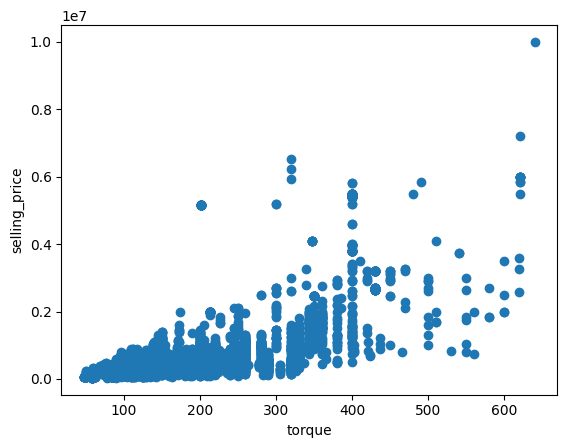

In [137]:
plt.scatter(non_null_df['torque'],non_null_df['selling_price'],)
plt.xlabel('torque')
plt.ylabel('selling_price')
plt.show()

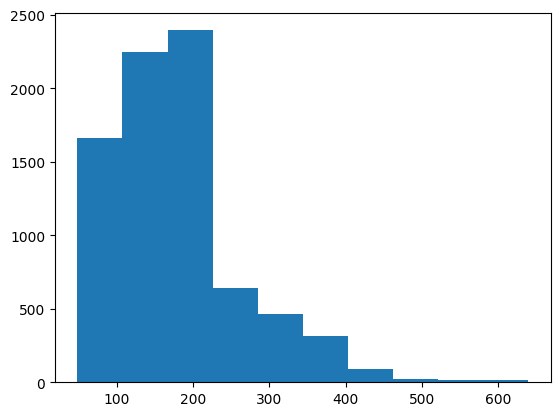

In [138]:
plt.hist(non_null_df['torque'])
plt.show()

In [139]:
df_torque = non_null_df.groupby(['brand_name','model'])['torque'].median().reset_index()

In [140]:
df_torque

,brand_name,model,torque
0,Audi,A4,390.0
1,Audi,A6,380.0
2,Audi,Other,320.0
3,Audi,Q3,380.0
4,Audi,Q5,400.0
...,...,...,...
162,Volkswagen,Polo,180.0
163,Volkswagen,Vento,250.0
164,Volvo,Other,400.0
165,Volvo,V40,350.0


In [141]:
df_torque[df_torque['brand_name'] == 'Maruti']['torque'].median()

113.0

In [142]:
df_torque[df_torque['brand_name'] == 'BMW']

,brand_name,model,torque
6,BMW,3-Series,380.0
7,BMW,5-Series,400.0
8,BMW,6-Series,620.0
9,BMW,Other,540.0
10,BMW,X1,400.0
11,BMW,X4,400.0


In [143]:
df_torque[df_torque['brand_name'] == 'Chevrolet']['torque'].median()

171.75

In [144]:
numeric_variables

['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

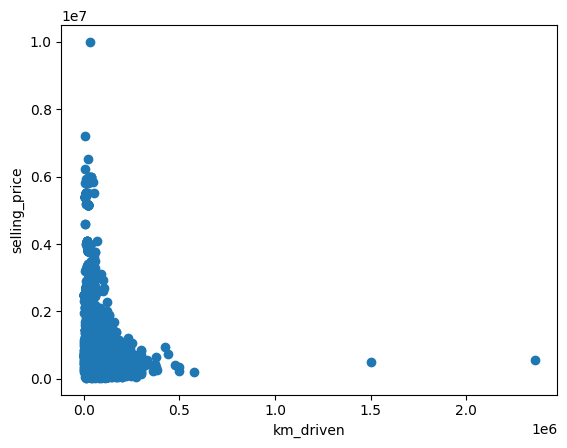

In [145]:
plt.scatter(non_null_df['km_driven'],non_null_df['selling_price'],)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

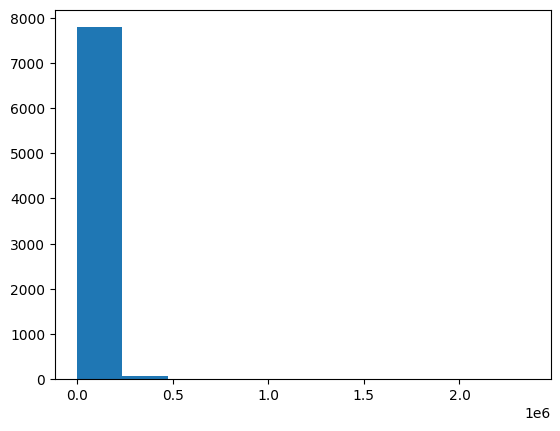

In [146]:
plt.hist(non_null_df['km_driven'])
plt.show()

In [147]:
non_null_df['km_driven'].min(),non_null_df['km_driven'].max()

(1, 2360457)

In [148]:
q1 = non_null_df['km_driven'].quantile(0.25)
q2 = non_null_df['km_driven'].quantile(0.50)
q3 = non_null_df['km_driven'].quantile(0.75)

lower_limit_km_driven = q1 - 1.5*(q3-q1)
higher_limit_km_driven = q1 + 1.5*(q3-q1)

In [149]:
lower_limit_km_driven,higher_limit_km_driven

(-55000.0, 125000.0)

In [150]:
non_null_df[non_null_df['km_driven'] < 1000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
7866,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Other,15.1,1196.0,73.0,101.0,5,Maruti,Eeco


In [151]:
driven_df = non_null_df.groupby(['brand_name','model'])['km_driven'].median().reset_index()

In [152]:
non_null_df['km_driven'] = np.where(non_null_df['km_driven'] < 1000,driven_df[driven_df['brand_name'] == 'Maruti']['km_driven'].median(),non_null_df['km_driven'])

In [153]:
non_null_df[non_null_df['km_driven'] < 1000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model


In [154]:
driven_df[driven_df['brand_name'] == 'Maruti']['km_driven'].median()

59500.0

In [155]:
non_null_df[non_null_df['km_driven'] > non_null_df['km_driven'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
390,Toyota Innova 2.5 G1 Diesel 8-seater,2005,250000,240000.0,Diesel,Individual,Manual,Third Owner,12.80,2494.0,102.00,204.0,8,Toyota,Innova
397,Tata Indigo LS,2012,95000,265000.0,Diesel,Individual,Manual,Second Owner,17.00,1405.0,70.00,135.0,5,Tata,Indigo
457,Toyota Innova 2.5 G (Diesel) 7 Seater,2012,730000,250000.0,Diesel,Individual,Manual,First Owner,12.99,2494.0,100.00,200.0,7,Toyota,Innova
880,Mahindra Bolero DI Non AC BSIII,2010,320000,300000.0,Diesel,Individual,Manual,Third Owner,13.60,2523.0,63.00,180.0,7,Mahindra,Bolero
992,Maruti Wagon R LXI BS IV,2012,220000,360003.0,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.0,5,Maruti,Wagon-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,Audi Q3 2.0 TDI Quattro Premium Plus,2014,1200000,230000.0,Diesel,Individual,Automatic,First Owner,15.73,1968.0,174.33,380.0,5,Audi,Q3
7898,Toyota Innova 2.5 G (Diesel) 7 Seater,2012,730000,250000.0,Diesel,Individual,Manual,First Owner,12.99,2494.0,100.00,200.0,7,Toyota,Innova
7922,Toyota Innova 2.5 G (Diesel) 7 Seater,2012,730000,250000.0,Diesel,Individual,Manual,First Owner,12.99,2494.0,100.00,200.0,7,Toyota,Innova
7983,Tata Sumo Gold EX,2014,275000,300000.0,Diesel,Individual,Manual,First Owner,15.30,2956.0,83.83,250.0,7,Tata,Sumo


In [156]:
non_null_df['km_driven'].max()

2360457.0

In [157]:
non_null_df[non_null_df['km_driven'] >= 800000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
1802,Mahindra XUV500 W6 2WD,2012,500000,1500000.0,Diesel,Individual,Manual,First Owner,15.1,2179.0,140.00,330.0,7,Mahindra,XUV500
3470,Hyundai i20 Asta 1.2,2007,550000,2360457.0,Petrol,Individual,Manual,Second Owner,18.6,1197.0,81.83,114.7,5,Hyundai,i20


In [158]:
non_null_df[non_null_df['km_driven'] >= 2000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
3470,Hyundai i20 Asta 1.2,2007,550000,2360457.0,Petrol,Individual,Manual,Second Owner,18.6,1197.0,81.83,114.7,5,Hyundai,i20


In [159]:
non_null_df['km_driven'] = np.where(non_null_df['km_driven'] >= 2000000,driven_df[driven_df['brand_name'] == 'Hyundai']['km_driven'].median(),non_null_df['km_driven'])

In [160]:
non_null_df[non_null_df['km_driven'] >= 2000000]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model


In [161]:
non_null_df['km_driven'] = np.where(non_null_df['km_driven'] == 1500000.0,driven_df[driven_df['brand_name'] == 'Mahindra']['km_driven'].median(),non_null_df['km_driven'])

In [162]:
non_null_df['km_driven'].describe()

count      7859.000000
mean      68664.547271
std       47831.061054
min        1000.000000
25%       35000.000000
50%       60000.000000
75%       95000.000000
max      577414.000000
Name: km_driven, dtype: float64

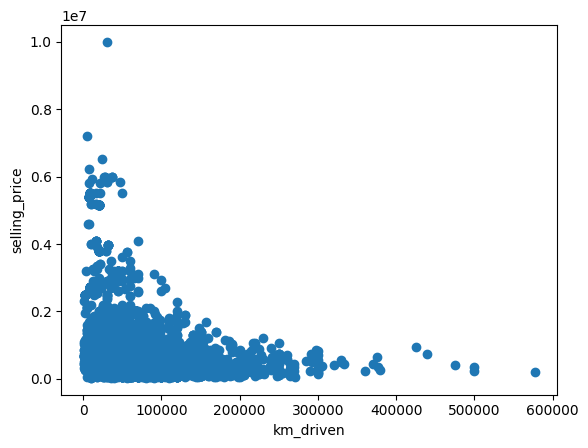

In [163]:
plt.scatter(non_null_df['km_driven'],non_null_df['selling_price'],)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

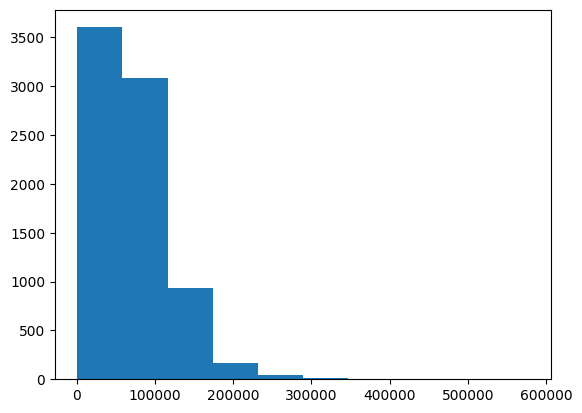

In [164]:
plt.hist(non_null_df['km_driven'])
plt.show()

In [165]:
non_null_df[['km_driven','selling_price']].corr()

,km_driven,selling_price
km_driven,1.000000,-0.259946
selling_price,-0.259946,1.000000


In [166]:
non_null_df['selling_price'].describe()

count    7.859000e+03
mean     6.459899e+05
std      8.089546e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

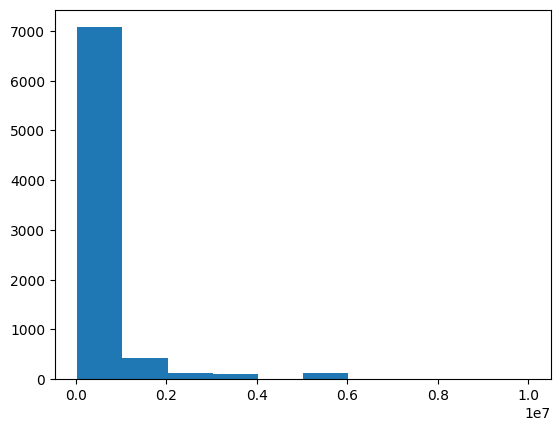

In [167]:
plt.hist(non_null_df['selling_price'])
plt.show()

In [168]:
non_null_df['selling_price'].min(),non_null_df['selling_price'].max()

(29999, 10000000)

In [169]:
q1 = non_null_df['selling_price'].quantile(0.25)
q2 = non_null_df['selling_price'].quantile(0.50)
q3 = non_null_df['selling_price'].quantile(0.75)

lower_limit_selling_price = q1 - 1.5*(q3-q1)
higher_limit_selling_price = q1 + 1.5*(q3-q1)

In [170]:
lower_limit_selling_price,higher_limit_selling_price

(-345000.0, 885000.0)

In [171]:
non_null_df[non_null_df['selling_price'] > non_null_df['selling_price'].quantile(0.99)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
134,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000.0,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,620.0,5,Mercedes-Benz,S-Class
137,BMW X4 M Sport X xDrive20d,2019,5800000,7500.0,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,5,BMW,X4
145,Mercedes-Benz S-Class S 350 CDI,2017,5850000,47000.0,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,282.00,490.0,5,Mercedes-Benz,S-Class
167,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000.0,Petrol,Individual,Automatic,First Owner,18.00,1969.0,190.00,640.0,4,Volvo,Other
380,BMW X4 M Sport X xDrive20d,2019,5400000,7500.0,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,5,BMW,X4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552,BMW 6 Series GT 630d Luxury Line,2018,5830000,30000.0,Diesel,Individual,Automatic,First Owner,17.09,2993.0,261.40,620.0,4,BMW,6-Series
7668,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000.0,Diesel,Dealer,Automatic,First Owner,13.50,2987.0,254.79,620.0,5,Mercedes-Benz,S-Class
7826,BMW X4 M Sport X xDrive20d,2019,5400000,7500.0,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,5,BMW,X4
7827,BMW X4 M Sport X xDrive20d,2019,5500000,8500.0,Diesel,Dealer,Automatic,First Owner,16.78,1995.0,190.00,400.0,5,BMW,X4


In [172]:
non_null_df[non_null_df['selling_price'] > non_null_df['selling_price'].quantile(0.99)]['brand_name'].value_counts()

brand_name
BMW              69
Mercedes-Benz     4
Volvo             3
Audi              3
Name: count, dtype: int64

In [173]:
non_null_df['selling_price'].max()

10000000

In [174]:
non_null_df['selling_price'] = np.where(non_null_df['selling_price'] >= 8000000,5500000.0,non_null_df['selling_price'])

In [175]:
price_df = non_null_df.groupby(['brand_name','model'])['selling_price'].median().reset_index()

In [176]:
price_df

,brand_name,model,selling_price
0,Audi,A4,1675000.0
1,Audi,A6,2200000.0
2,Audi,Other,2600000.0
3,Audi,Q3,2587500.0
4,Audi,Q5,3975000.0
...,...,...,...
162,Volkswagen,Polo,416000.0
163,Volkswagen,Vento,372500.0
164,Volvo,Other,5500000.0
165,Volvo,V40,2475000.0


In [177]:
price_df[price_df['brand_name']=='Volvo']

,brand_name,model,selling_price
164,Volvo,Other,5500000.0
165,Volvo,V40,2475000.0
166,Volvo,XC40,3800000.0


In [178]:
non_null_df['selling_price'].describe()

count    7.859000e+03
mean     6.454173e+05
std      8.039096e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.800000e+05
max      7.200000e+06
Name: selling_price, dtype: float64

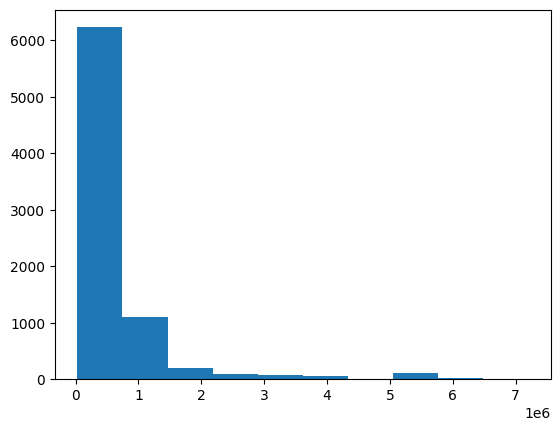

In [179]:
plt.hist(non_null_df['selling_price'])
plt.show()

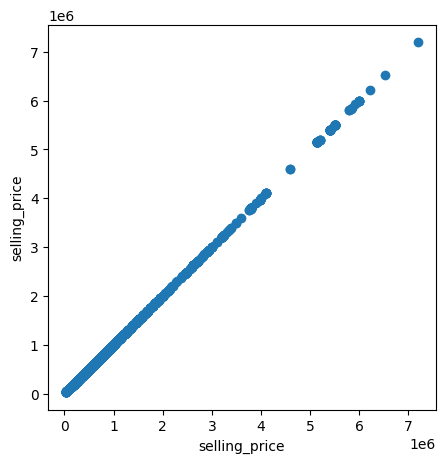

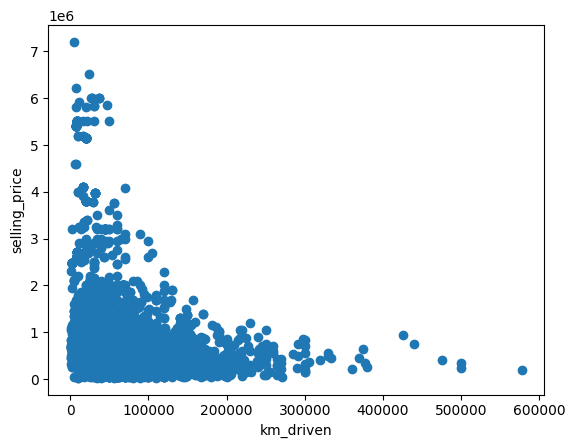

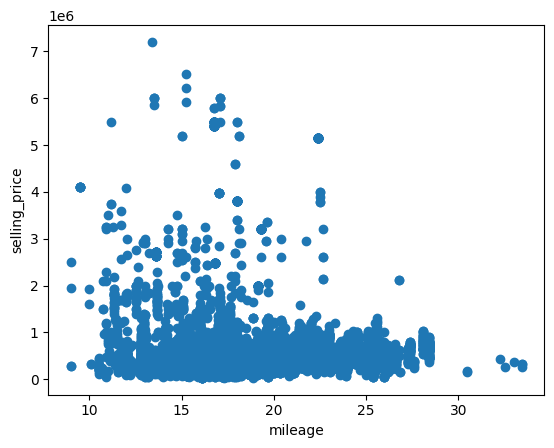

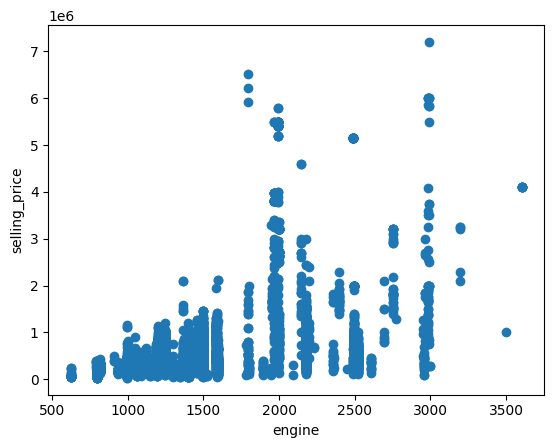

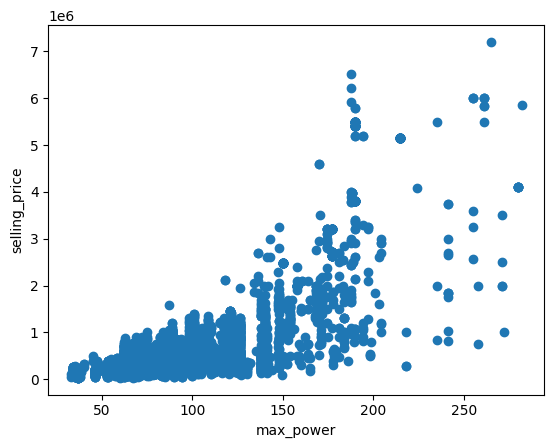

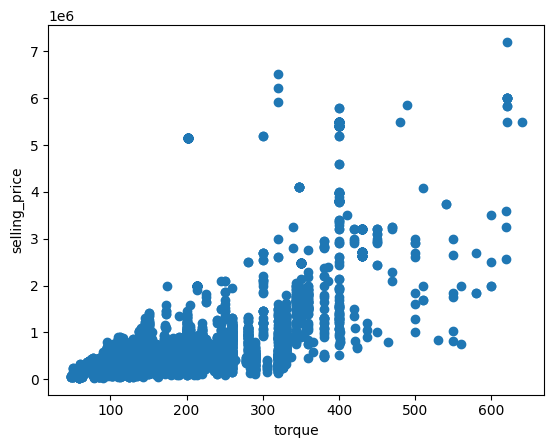

In [180]:
plt.figure(figsize=(5,5))

for i in numeric_variables:
    plt.scatter(non_null_df[i],non_null_df['selling_price'],)
    plt.xlabel(f'{i}')
    plt.ylabel('selling_price')
    plt.show()

In [181]:
non_null_df[numeric_variables].describe()

,selling_price,km_driven,mileage,engine,max_power,torque
count,7.859000e+03,7859.000000,7859.000000,7859.000000,7859.000000,7859.000000
mean,6.454173e+05,68664.547271,19.480485,1455.255503,91.410424,176.732991
std,8.039096e+05,47831.061054,3.921261,501.663817,35.470011,89.589047
min,2.999900e+04,1000.000000,9.000000,624.000000,32.800000,48.000000
25%,2.700000e+05,35000.000000,16.800000,1197.000000,68.050000,111.800000
50%,4.500000e+05,60000.000000,19.330000,1248.000000,82.000000,170.000000
75%,6.800000e+05,95000.000000,22.320000,1582.000000,102.000000,205.000000
max,7.200000e+06,577414.000000,33.440000,3604.000000,282.000000,640.000000


In [182]:
non_null_df[numeric_variables].corr()

,selling_price,km_driven,mileage,engine,max_power,torque
selling_price,1.000000,-0.261001,-0.134262,0.457686,0.747448,0.631898
km_driven,-0.261001,1.000000,-0.206112,0.242487,-0.047301,0.102808
mileage,-0.134262,-0.206112,1.000000,-0.589071,-0.392208,-0.279045
engine,0.457686,0.242487,-0.589071,1.000000,0.706886,0.742869
max_power,0.747448,-0.047301,-0.392208,0.706886,1.000000,0.848335
torque,0.631898,0.102808,-0.279045,0.742869,0.848335,1.000000


In [183]:
df['selling_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8075    320000
8076    135000
8077    382000
8078    290000
8079    290000
Name: selling_price, Length: 8080, dtype: int64

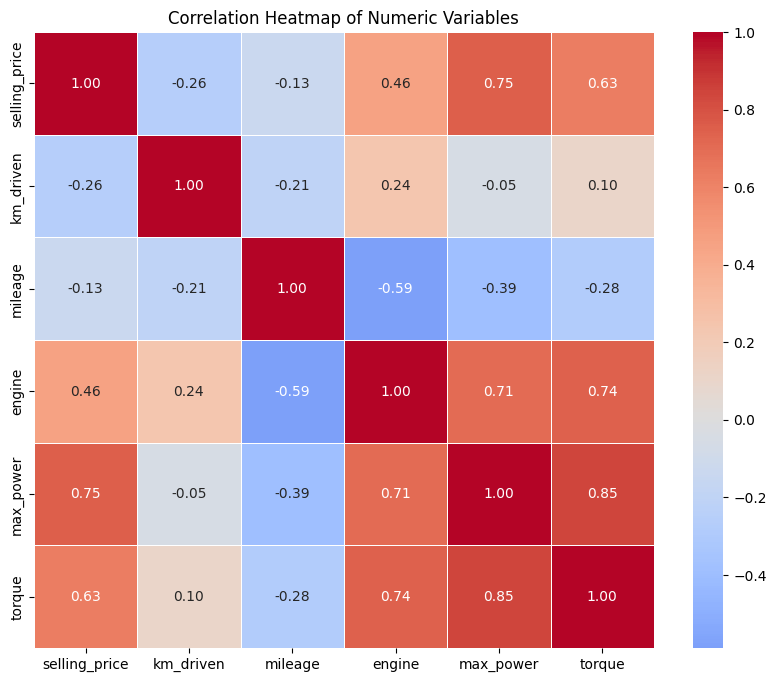

In [184]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = non_null_df[numeric_variables].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

# Display the heatmap
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [185]:
null_df = df[df['torque'].isnull()]

In [186]:
null_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Fiat,Other
77,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,Tata,Indica
86,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
118,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,7,Toyota,Qualis
7949,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Hyundai,Santro
7962,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Hyundai,Santro
8021,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,Ford,Figo


In [187]:
null_df = df[df['torque'].isnull()]

In [188]:
null_df.reset_index(drop=True,inplace=True)

In [189]:
null_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
1,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Fiat,Other
2,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,Tata,Indica
3,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
4,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,7,Toyota,Qualis
217,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Hyundai,Santro
218,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Hyundai,Santro
219,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,Ford,Figo


In [190]:
null_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          220
engine           220
max_power        215
torque           221
seats              0
brand_name         0
model              0
dtype: int64

In [191]:
null_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
1,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Fiat,Other
2,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,Tata,Indica
3,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
4,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,7,Toyota,Qualis
217,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Hyundai,Santro
218,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,5,Hyundai,Santro
219,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,5,Ford,Figo


In [192]:
engine_df = non_null_df.groupby(['brand_name'])['engine'].median().reset_index()

In [193]:
brand_list = engine_df['brand_name'].tolist()

In [194]:
engine_list = engine_df['engine'].tolist()

In [195]:
dict_engine = dict(zip(brand_list,engine_list))

In [196]:
null_df['engine'] = null_df.apply(lambda x: dict_engine.get(x['brand_name'], None), axis=1)

In [197]:
null_df['engine'].describe()

count     221.000000
mean     1509.348416
std       502.419565
min      1197.000000
25%      1197.000000
50%      1197.000000
75%      1497.000000
max      2494.000000
Name: engine, dtype: float64

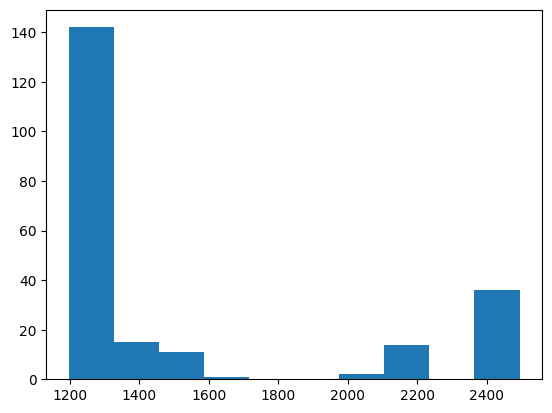

In [198]:
plt.hist(null_df['engine'])
plt.show()

In [199]:
power_df = non_null_df.groupby(['brand_name'])['max_power'].median().reset_index()

In [200]:
brand_list = power_df['brand_name'].tolist()

In [201]:
power_list = power_df['max_power'].tolist()

In [202]:
dict_power = dict(zip(brand_list,power_list))

In [203]:
null_df['max_power'] = null_df.apply(lambda x: dict_power.get(x['brand_name'], None), axis=1)

In [204]:
null_df['max_power'].describe()

count    221.000000
mean      85.541606
std       14.738847
min       74.000000
25%       74.000000
50%       81.860000
75%       94.805000
max      190.000000
Name: max_power, dtype: float64

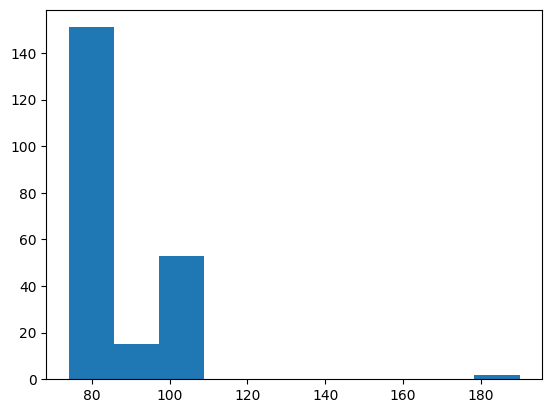

In [205]:
plt.hist(null_df['max_power'])
plt.show()

In [206]:
mileage_df = non_null_df.groupby(['brand_name'])['mileage'].median().reset_index()

In [207]:
brand_list = mileage_df['brand_name'].tolist()

In [208]:
mileage_list = mileage_df['mileage'].tolist()

In [209]:
dict_mileage = dict(zip(brand_list,mileage_list))

In [210]:
null_df['mileage'] = null_df.apply(lambda x: dict_mileage.get(x['brand_name'], None), axis=1)

In [211]:
null_df['mileage'].describe()

count    221.000000
mean      18.873937
std        2.935429
min       12.990000
25%       18.800000
50%       19.810000
75%       21.210000
max       21.210000
Name: mileage, dtype: float64

In [212]:
null_df['mileage'].isnull().sum()

0

In [213]:
non_null_df['mileage'].isnull().sum()

0

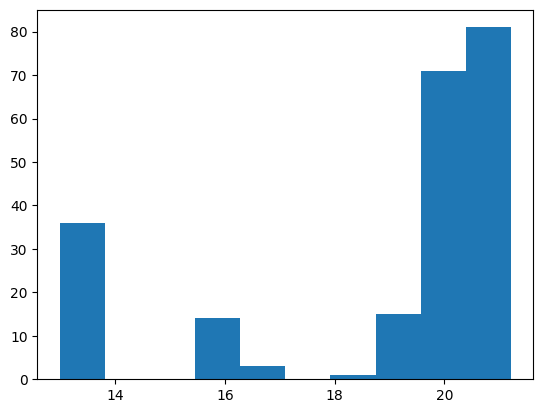

In [214]:
plt.hist(null_df['mileage'])
plt.show()

In [215]:
torque_df = non_null_df.groupby(['brand_name'])['torque'].median().reset_index()

In [216]:
torque_df

,brand_name,torque
0,Audi,390.00
1,BMW,400.00
2,Chevrolet,150.00
3,Datsun,104.00
4,Fiat,197.00
5,Ford,160.00
6,Honda,145.00
7,Hyundai,114.73
8,Jaguar,430.00
9,Jeep,350.00


In [217]:
brand_list = torque_df['brand_name'].tolist()

In [218]:
brand_list

['Audi',
 'BMW',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Ford',
 'Honda',
 'Hyundai',
 'Jaguar',
 'Jeep',
 'Lexus',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Nissan',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [219]:
torque_list = torque_df['torque'].tolist()

In [220]:
torque_list

[390.0,
 400.0,
 150.0,
 104.0,
 197.0,
 160.0,
 145.0,
 114.73,
 430.0,
 350.0,
 202.0,
 240.0,
 113.0,
 400.0,
 200.0,
 96.0,
 210.0,
 140.0,
 200.0,
 230.0,
 400.0]

In [221]:
torque_mileage = dict(zip(brand_list,torque_list))

In [222]:
torque_mileage

{'Audi': 390.0,
 'BMW': 400.0,
 'Chevrolet': 150.0,
 'Datsun': 104.0,
 'Fiat': 197.0,
 'Ford': 160.0,
 'Honda': 145.0,
 'Hyundai': 114.73,
 'Jaguar': 430.0,
 'Jeep': 350.0,
 'Lexus': 202.0,
 'Mahindra': 240.0,
 'Maruti': 113.0,
 'Mercedes-Benz': 400.0,
 'Nissan': 200.0,
 'Renault': 96.0,
 'Skoda': 210.0,
 'Tata': 140.0,
 'Toyota': 200.0,
 'Volkswagen': 230.0,
 'Volvo': 400.0}

In [223]:
null_df['torque'] = null_df.apply(lambda x: torque_mileage.get(x['brand_name'], None), axis=1)

In [224]:
null_df['torque'].describe()

count    221.000000
mean     145.385294
std       49.021341
min      113.000000
25%      113.000000
50%      114.730000
75%      197.000000
max      400.000000
Name: torque, dtype: float64

In [225]:
null_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,21.21,1197.0,74.000,113.00,5,Maruti,Swift
1,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,20.30,1248.0,90.000,197.00,5,Fiat,Other
2,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,18.80,1396.0,83.830,140.00,5,Tata,Indica
3,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,21.21,1197.0,74.000,113.00,5,Maruti,Swift
4,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,21.21,1197.0,74.000,113.00,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,12.99,2494.0,102.000,200.00,7,Toyota,Qualis
217,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,5,Hyundai,Santro
218,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,5,Hyundai,Santro
219,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,20.00,1497.0,94.805,160.00,5,Ford,Figo


In [226]:
non_null_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift Dzire VDI,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,Skoda Rapid 1.5 TDI Ambition,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,Hyundai i20 Magna,2013,320000.0,110000.0,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5,Hyundai,i20
8076,Hyundai Verna CRDi SX,2007,135000.0,119000.0,Diesel,Individual,Manual,Other,16.80,1493.0,110.00,240.0,5,Hyundai,Verna
8077,Maruti Swift Dzire ZDi,2009,382000.0,120000.0,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.0,5,Maruti,Swift-Dzire
8078,Tata Indigo CR4,2013,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5,Tata,Indigo


In [227]:
car_df = pd.concat([non_null_df,null_df])

In [228]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,Maruti Swift Dzire VDI,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.000,190.00,5,Maruti,Swift-Dzire
1,Skoda Rapid 1.5 TDI Ambition,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.520,250.00,5,Skoda,Rapid
2,Honda City 2017-2020 EXi,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.000,127.00,5,Honda,City
3,Hyundai i20 Sportz Diesel,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.000,224.00,5,Hyundai,i20
4,Maruti Swift VXI BSIII,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.200,115.00,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Toyota Qualis Fleet A3,2000,200000.0,100000.0,Diesel,Individual,Manual,First Owner,12.99,2494.0,102.000,200.00,7,Toyota,Qualis
217,Hyundai Santro LS zipPlus,2000,140000.0,50000.0,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,5,Hyundai,Santro
218,Hyundai Santro Xing XS eRLX Euro III,2006,145000.0,80000.0,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,5,Hyundai,Santro
219,Ford Figo Aspire Facelift,2017,580000.0,165000.0,Diesel,Individual,Manual,First Owner,20.00,1497.0,94.805,160.00,5,Ford,Figo


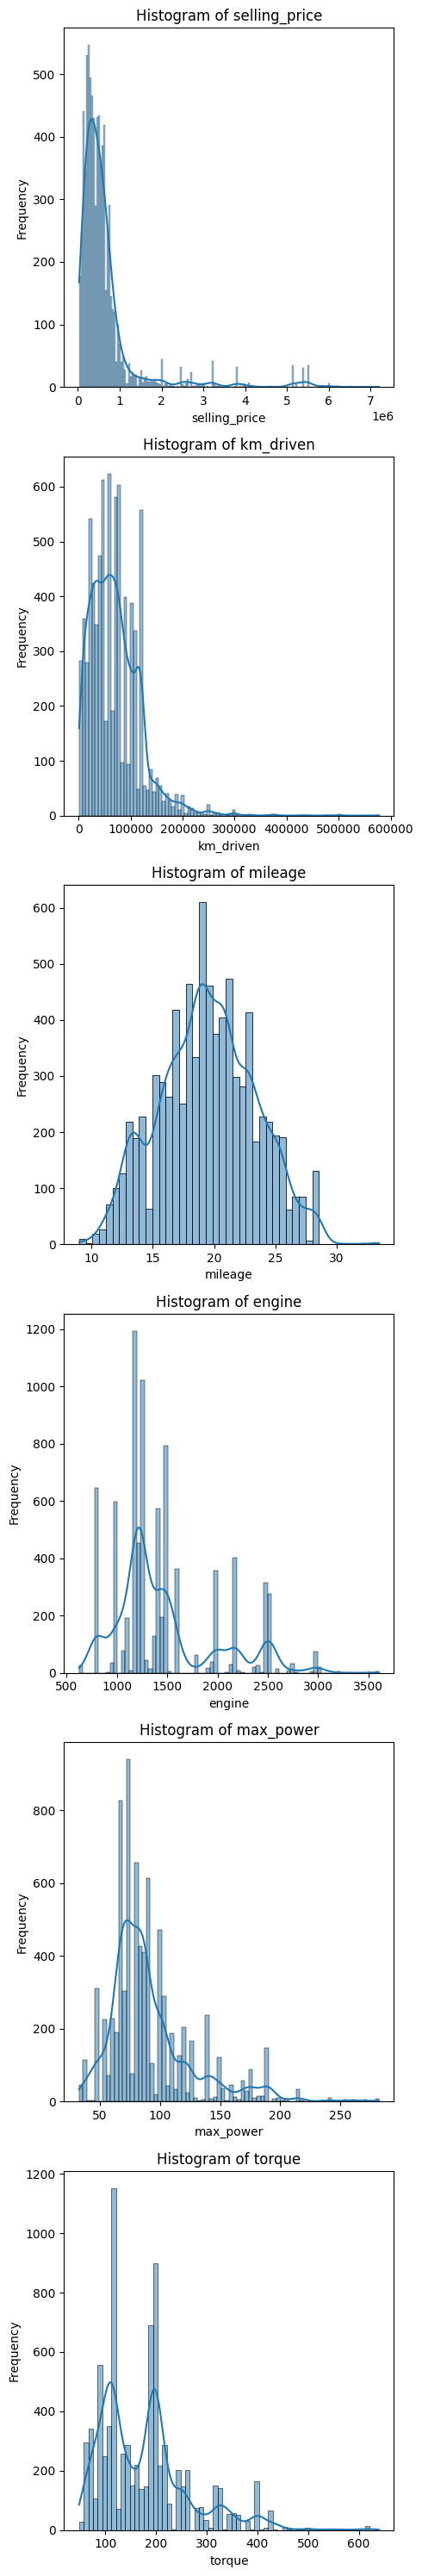

In [229]:

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(numeric_variables), figsize=(5, 5 * len(numeric_variables)))

# Plot histograms for each continuous variable
for i, column in enumerate(numeric_variables):
    sns.histplot(car_df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [230]:
car_df.reset_index(drop=True,inplace=True)

In [231]:
car_df.drop(columns='name',inplace=True)

In [232]:
car_df.shape

(8080, 14)

In [233]:
car_df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
brand_name       0
model            0
dtype: int64

In [234]:
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.000,190.00,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.520,250.00,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.000,127.00,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.000,224.00,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.200,115.00,5,Maruti,Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,2000,200000.0,100000.0,Diesel,Individual,Manual,First Owner,12.99,2494.0,102.000,200.00,7,Toyota,Qualis
8076,2000,140000.0,50000.0,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,5,Hyundai,Santro
8077,2006,145000.0,80000.0,Petrol,Individual,Manual,Second Owner,19.81,1197.0,81.860,114.73,5,Hyundai,Santro
8078,2017,580000.0,165000.0,Diesel,Individual,Manual,First Owner,20.00,1497.0,94.805,160.00,5,Ford,Figo


In [235]:
# Save the DataFrame to a CSV file
car_df.to_csv("cleaned_dataset_car.csv", index=False)